#Начальные установки и загрузка

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import sys
from IPython.display import clear_output
from google.colab.patches import cv2_imshow
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from scipy.signal import find_peaks_cwt

In [ ]:
angles_dict={
    'a12_14_16': 'угол в правом локтевом суставе',
    'a11_13_15': 'угол в левом локтевом суставе',
    'a14_12_24': 'угол в правом плечевом суставе (вертикально)',
    'a13_11_23': 'угол в левом плечевом суставе (вертикально)',
    'a14_12_11': 'угол в правом плечевом суставе (горизонтально)',
    'a13_11_12': 'угол в левом плечевом суставе (горизонтально)',
    'a24_26_28': 'угол в правом коленном суставе',
    'a23_25_27': 'угол в левом коленном суставе',
    'a12_24_26': 'угол в правом тазобедренном суставе',
    'a11_23_25': 'угол в левом тазобедренном суставе',
    'a25_27_31': 'угол в левой стопе',
    'a26_28_32': 'угол в правой стопе',
    'a23_11_7':  'угол между линиями правые бедро-плечо-ухо',
    'a24_12_8' : 'угол между линиями левые бедро-плечо-ухо',
    'g12_11_28_27' : 'угол между линией плеч и линией щиколоток',
    'g12_11_24_23' : 'угол между линией плеч и линией таза',
    'g12_11_26_25' : 'угол между линией плеч и линией колен',
    'g12_11_14_13' : 'угол между линией плеч и линией локтей',
    'g12_11_16_15' : 'угол между линией плеч и линией запястий',
    'g14_16_13_15' : 'угол между линией локоть-запястье правой руки и левой руки',
    'g12_14_11_13' : 'угол между линией плечо-локоть правой руки и левой руки',
    'g24_26_23_25' : 'угол между линией бедро-колено правой ноги и левой ноги',
    'g26_28_25_27' : 'угол между линией колено-щиколотка правой ноги и левой ноги',
    'o12_14_OY' : 'угол между линия плечо-локоть правой руки и OY',
    'o12_14_OX' : 'угол между линия плечо-локоть правой руки и OX',
    'o12_14_OZ' : 'угол между линия плечо-локоть правой руки и OZ',
    'o11_13_OY' : 'угол между линия плечо-локоть левой руки и OY',
    'o11_13_OX' : 'угол между линия плечо-локоть левой руки и OX',
    'o11_13_OZ' : 'угол между линия плечо-локоть левой руки и OZ',
    'o14_16_OY' : 'угол между линия локоть-запястье правой руки и OY',
    'o14_16_OX' : 'угол между линия локоть-запястье правой руки и OX',
    'o14_16_OZ' : 'угол между линия локоть-запястье правой руки и OZ',
    'o13_15_OY' : 'угол между линия локоть-запястье левой руки и OY',
    'o13_15_OX' : 'угол между линия локоть-запястье левой руки и OX',
    'o13_15_OZ' : 'угол между линия локоть-запястье левой руки и OZ',
    'o24_26_OY' : 'угол между линия бедро-колено правой ноги и OY',
    'o24_26_OX' : 'угол между линия бедро-колено правой ноги и OX',
    'o24_26_OZ' : 'угол между линия бедро-колено правой ноги и OZ',
    'o23_25_OY' : 'угол между линия бедро-колено левой ноги и OY',
    'o23_25_OX' : 'угол между линия бедро-колено левой ноги и OX',
    'o23_25_OZ' : 'угол между линия бедро-колено левой ноги и OZ',
    'o26_28_OY' : 'угол между линия колено-щиколотка правой ноги и OY',
    'o26_28_OX' : 'угол между линия колено-щиколотка правой ноги и OX',
    'o26_28_OZ' : 'угол между линия колено-щиколотка правой ноги и OZ',
    'o25_27_OY' : 'угол между линия колено-щиколотка левой ноги и OY',
    'o25_27_OX' : 'угол между линия колено-щиколотка левой ноги и OX',
    'o25_27_OZ' : 'угол между линия колено-щиколотка левой ноги и OZ'
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/internship/karate/dataset'
filename = 'dataset__all_features.csv'   # здесь нужно указать название обрабатываемого файла
df = pd.read_csv(os.path.join(data_path,filename))

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,o24_26_OZ,o23_25_OY,o23_25_OX,o23_25_OZ,o26_28_OY,o26_28_OX,o26_28_OZ,o25_27_OY,o25_27_OX,o25_27_OZ
0,0,0,0,0,0,0,0,0,0,1,...,-0.320266,0.925819,0.330658,-0.183095,0.842526,-0.251213,0.476489,0.787591,0.045598,0.614508
1,0,0,0,0,0,0,0,0,0,1,...,-0.358186,0.908620,0.318595,-0.270015,0.847875,-0.252573,0.466171,0.856474,0.052875,0.513474
2,0,0,0,0,0,0,0,0,0,1,...,-0.392047,0.820056,0.288839,-0.494045,0.831219,-0.246556,0.498283,0.849801,0.051036,0.524627
3,0,0,0,0,0,0,0,0,0,1,...,-0.386496,0.842421,0.290291,-0.453936,0.830638,-0.245556,0.499743,0.846481,0.050976,0.529973
4,0,0,0,0,0,0,0,0,0,1,...,-0.390121,0.822300,0.278694,-0.496137,0.847154,-0.250359,0.468669,0.868949,0.052760,0.492081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142363,0,0,1,0,0,0,0,0,0,0,...,-0.455400,0.698299,0.489481,-0.522291,0.552038,-0.363697,0.750319,0.636238,-0.042069,0.770345
142364,0,0,1,0,0,0,0,0,0,0,...,-0.447005,0.704808,0.496040,-0.507139,0.534342,-0.367378,0.761257,0.638538,-0.042032,0.768442
142365,0,0,1,0,0,0,0,0,0,0,...,-0.453217,0.770869,0.539021,-0.339435,0.557973,-0.401605,0.726209,0.648042,-0.042260,0.760431
142366,0,0,1,0,0,0,0,0,0,0,...,-0.455419,0.771385,0.555455,-0.310540,0.563317,-0.430092,0.705475,0.653394,-0.044460,0.755711


In [141]:
file_names=[x for x in list(df['filename'].unique()) if x.find('КИДЗАМИ ДЗУКИ')>=0]
#file_names=[x for x in list(df['filename'].unique()) if x.find('МАВАШИ ГЕРИ')>=0]
file_names

['Андрей КИДЗАМИ ДЗУКИ (2)',
 'Дима КИДЗАМИ ДЗУКИ (2)',
 'Максим КИДЗАМИ ДЗУКИ',
 'Миша КИДЗАМИ ДЗУКИ (2)',
 'Оля КИДЗАМИ ДЗУКИ (2)',
 'Эрика КИДЗАМИ ДЗУКИ (2)',
 'Андрей КИДЗАМИ ДЗУКИ',
 'Дима КИДЗАМИ ДЗУКИ',
 'Максим КИДЗАМИ ДЗУКИ ',
 'Миша КИДЗАМИ ДЗУКИ',
 'Оля КИДЗАМИ ДЗУКИ',
 'Эрика КИДЗАМИ ДЗУКИ',
 'Андрей КИДЗАМИ ДЗУКИ (кулак)',
 'Андрей КИДЗАМИ ДЗУКИ (локоть 1)',
 'Андрей КИДЗАМИ ДЗУКИ (с низу в верх 1)',
 'Максим КИДЗАМИ ДЗУКИ (кулак)',
 'Максим КИДЗАМИ ДЗУКИ (локоть 1)',
 'Максим КИДЗАМИ ДЗУКИ (с низу в верх 1)',
 'Андрей КИДЗАМИ ДЗУКИ (кулак 2)',
 'Андрей КИДЗАМИ ДЗУКИ (локоть 2)',
 'Андрей КИДЗАМИ ДЗУКИ (с низу в верх 2)',
 'Максим КИДЗАМИ ДЗУКИ (кулак 2)',
 'Максим КИДЗАМИ ДЗУКИ (локоть 2)',
 'Максим КИДЗАМИ ДЗУКИ (с низу в верх 2)']

#Эксперименты с данными и алгоритмами

##Обработка данных для первого видео (Андрей КИДЗАМИ ДЗУКИ (2))

In [161]:
#Пока возьмем только 1  видео 'right', 'Андрей КИДЗАМИ ДЗУКИ (2)', 'side', 'Андрей КИДЗАМИ ДЗУКИ (2).mp4'
#video_name='Дима КИДЗАМИ ДЗУКИ (2)'
video_name='Андрей КИДЗАМИ ДЗУКИ (2)'
#video_name='Максим КИДЗАМИ ДЗУКИ'
#video_name='Андрей КИДЗАМИ ДЗУКИ'
#video_name='Андрей МАВАШИ ГЕРИ (2)'
reference_angles=['o11_13_OY']
#reference_angles=['g24_26_23_25']
df1=df[df['filename']==video_name]
df1=df1.reset_index(drop=True)
df1

,0,1,2,3,4,5,6,7,8,9,...,o24_26_OZ,o23_25_OY,o23_25_OX,o23_25_OZ,o26_28_OY,o26_28_OX,o26_28_OZ,o25_27_OY,o25_27_OX,o25_27_OZ
0,0,0,1,0,0,0,0,0,0,0,...,-0.508660,0.724715,0.418956,-0.547050,0.673368,-0.227036,0.703584,0.673665,0.008626,0.738987
1,0,0,1,0,0,0,0,0,0,0,...,-0.388747,0.765150,0.433057,-0.476452,0.701309,-0.231413,0.674250,0.693709,0.010833,0.720174
2,0,0,1,0,0,0,0,0,0,0,...,-0.399284,0.839960,0.462930,-0.283130,0.716944,-0.233922,0.656713,0.703570,0.012967,0.710508
3,0,0,1,0,0,0,0,0,0,0,...,-0.388488,0.858573,0.469615,-0.205704,0.729678,-0.236502,0.641589,0.708990,0.014080,0.705078
4,0,0,1,0,0,0,0,0,0,0,...,-0.390069,0.858829,0.465662,-0.213477,0.729441,-0.235111,0.642370,0.707357,0.015864,0.706679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0,0,1,0,0,0,0,0,0,0,...,-0.262298,0.824392,0.548693,0.138973,0.653252,-0.359316,0.666449,0.785805,0.001577,0.618472
474,0,0,1,0,0,0,0,0,0,0,...,-0.273764,0.828186,0.551634,0.099030,0.643634,-0.355739,0.677632,0.781643,0.000930,0.623726
475,0,0,1,0,0,0,0,0,0,0,...,-0.265686,0.824740,0.549563,0.133355,0.661973,-0.366806,0.653639,0.788764,0.000868,0.614696
476,0,0,1,0,0,0,0,0,0,0,...,-0.264168,0.825999,0.548980,0.127855,0.657883,-0.364345,0.659123,0.784972,0.000126,0.619532


In [162]:
correct=df1['correct'][0]
main_folder=df1['main_folder'][0]
folder=df1['folder'][0]

In [163]:
#сформируем датасет в котором есть только cos углов (их имена начинаются на 'a','g','o')
column_list=list(df)
angle_column_list=[x for x in column_list if x.startswith(('a','g','o'))]
df_cos_angles=df1[angle_column_list]
df_cos_angles

,a12_14_16,a11_13_15,a14_12_24,a13_11_23,a14_12_11,a13_11_12,a24_26_28,a23_25_27,a12_24_26,a11_23_25,...,o24_26_OZ,o23_25_OY,o23_25_OX,o23_25_OZ,o26_28_OY,o26_28_OX,o26_28_OZ,o25_27_OY,o25_27_OX,o25_27_OZ
0,-0.590880,-0.197824,0.507541,0.911534,-0.596246,0.117594,-0.244719,-0.087566,-0.632975,-0.712212,...,-0.508660,0.724715,0.418956,-0.547050,0.673368,-0.227036,0.703584,0.673665,0.008626,0.738987
1,-0.500575,-0.224818,0.652086,0.906558,-0.508154,0.123685,-0.409500,-0.192354,-0.769087,-0.767202,...,-0.388747,0.765150,0.433057,-0.476452,0.701309,-0.231413,0.674250,0.693709,0.010833,0.720174
2,-0.490026,-0.239375,0.677431,0.907171,-0.492520,0.134457,-0.420728,-0.395807,-0.772202,-0.841515,...,-0.399284,0.839960,0.462930,-0.283130,0.716944,-0.233922,0.656713,0.703570,0.012967,0.710508
3,-0.493837,-0.252543,0.669726,0.907243,-0.501106,0.149803,-0.449113,-0.470295,-0.776851,-0.859132,...,-0.388488,0.858573,0.469615,-0.205704,0.729678,-0.236502,0.641589,0.708990,0.014080,0.705078
4,-0.496095,-0.252150,0.651804,0.907375,-0.511018,0.151796,-0.446950,-0.464026,-0.766281,-0.859630,...,-0.390069,0.858829,0.465662,-0.213477,0.729441,-0.235111,0.642370,0.707357,0.015864,0.706679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,-0.375345,0.043245,0.550720,0.885601,-0.564772,-0.207240,-0.500267,-0.734628,-0.776139,-0.809338,...,-0.262298,0.824392,0.548693,0.138973,0.653252,-0.359316,0.666449,0.785805,0.001577,0.618472
474,-0.372253,0.076630,0.554080,0.876136,-0.562169,-0.252147,-0.477673,-0.709626,-0.767577,-0.818421,...,-0.273764,0.828186,0.551634,0.099030,0.643634,-0.355739,0.677632,0.781643,0.000930,0.623726
475,-0.346545,0.071015,0.582160,0.879808,-0.542832,-0.241986,-0.509810,-0.732975,-0.777986,-0.810698,...,-0.265686,0.824740,0.549563,0.133355,0.661973,-0.366806,0.653639,0.788764,0.000868,0.614696
476,-0.395639,0.043622,0.567503,0.885042,-0.564843,-0.206084,-0.505274,-0.727665,-0.784012,-0.809728,...,-0.264168,0.825999,0.548980,0.127855,0.657883,-0.364345,0.659123,0.784972,0.000126,0.619532


In [164]:
#Найдем N углов, для которых изменения во время удара наиболее значительны
n_angles=8
df_angles=pd.DataFrame(np.arccos(df_cos_angles)*180/np.pi) # перевели в градусы (так нагляднее)
df_angles_change=np.max(df_angles,axis=0)-np.min(df_angles,axis=0) #Получили series с данными на сколько изменяеется тот или иной угол
df_angles_change

a12_14_16        78.423416
a11_13_15        56.105664
a14_12_24        67.948436
a13_11_23       102.919526
a14_12_11        43.286822
a13_11_12       104.548778
a24_26_28        36.248735
a23_25_27        83.090245
a12_24_26        53.392369
a11_23_25        64.051577
a25_27_31        28.331034
a26_28_32        38.254999
a23_11_7         34.395417
a24_12_8         35.425203
g12_11_28_27     40.546192
g12_11_24_23     14.883123
g12_11_26_25     31.923927
g12_11_14_13     18.472471
g12_11_16_15     27.985721
g14_16_13_15     65.428329
g12_14_11_13    129.698762
g24_26_23_25     36.423814
g26_28_25_27     33.546798
o12_14_OY        51.407618
o12_14_OX        41.468451
o12_14_OZ        53.205036
o11_13_OY       102.229131
o11_13_OX        64.666585
o11_13_OZ        69.088324
o14_16_OY        47.050720
o14_16_OX        67.331839
o14_16_OZ        58.806332
o13_15_OY        28.547231
o13_15_OX        45.227207
o13_15_OZ        50.493319
o24_26_OY        40.753384
o24_26_OX        16.957380
o

In [165]:
#отсоритирум колонки по значению изменений
sorted_column=df_angles_change.sort_values(ascending=False).index #Отсортировали колонки в порядке убывания
main_angles=list(sorted_column)[:n_angles] #Список самых значмиых углов. Теперь именно эти углы будем анализировать
for col in main_angles:
  print (f'Угол {angles_dict[col]} ({col}) изменяется на {df_angles_change[col]:4.2f} градусов')

Угол угол между линией плечо-локоть правой руки и левой руки (g12_14_11_13) изменяется на 129.70 градусов
Угол угол в левом плечевом суставе (горизонтально) (a13_11_12) изменяется на 104.55 градусов
Угол угол в левом плечевом суставе (вертикально) (a13_11_23) изменяется на 102.92 градусов
Угол угол между линия плечо-локоть левой руки и OY (o11_13_OY) изменяется на 102.23 градусов
Угол угол в левом коленном суставе (a23_25_27) изменяется на 83.09 градусов
Угол угол между линия бедро-колено левой ноги и OZ (o23_25_OZ) изменяется на 80.30 градусов
Угол угол в правом локтевом суставе (a12_14_16) изменяется на 78.42 градусов
Угол угол между линия плечо-локоть левой руки и OZ (o11_13_OZ) изменяется на 69.09 градусов


In [166]:
#проверим, что колонки из reference_angles входят в список main_angles, Если нет, то добавим их
for angle in reference_angles:
  if angle not  in main_angles:
    main_angles.append(angle)

print (main_angles)

['g12_14_11_13', 'a13_11_12', 'a13_11_23', 'o11_13_OY', 'a23_25_27', 'o23_25_OZ', 'a12_14_16', 'o11_13_OZ']


In [167]:
#Сделаем датафрейм, который содержит только самые значимые углы и углы из reference_angles

df_angles=df_angles[main_angles]
df_angles

,g12_14_11_13,a13_11_12,a13_11_23,o11_13_OY,a23_25_27,o23_25_OZ,a12_14_16,o11_13_OZ
0,29.853606,83.246706,24.281817,23.221018,95.023573,123.164877,126.219479,102.866059
1,23.654457,82.895166,24.966045,24.839380,101.090202,118.453931,120.038048,104.256709
2,22.099379,82.272766,24.882690,25.254571,113.316311,106.447130,119.342306,105.102437
3,21.821577,81.384469,24.872873,25.643064,118.053473,101.870696,119.593062,105.806458
4,22.337265,81.268952,24.854974,25.580370,117.647208,102.326184,119.741965,105.670449
...,...,...,...,...,...,...,...,...
473,47.015458,101.960661,27.674483,25.371698,137.275821,82.011557,112.045659,80.909594
474,49.333084,104.604615,28.820249,26.129062,135.204509,84.316699,111.854639,77.957933
475,47.431781,104.003807,28.380743,25.577821,137.136404,82.336483,110.276130,78.415701
476,46.851533,101.892955,27.743346,24.840564,136.690994,82.654340,113.305831,80.543694


In [168]:
#Получим для каждого кадра (начиная со второго) значение изменения угла в градусах от кадра к кадру (фактически скорость)
speeds=df_angles[1:].values-df_angles[:-1].values
speeds=np.vstack((np.zeros(shape=len(main_angles)),speeds))#Будем считать что для первого кадра скорость =0
speed_column_list=[x+'_speed' for x in list(df_angles)]
df_speed=pd.DataFrame(speeds,columns=speed_column_list)
df_speed

,g12_14_11_13_speed,a13_11_12_speed,a13_11_23_speed,o11_13_OY_speed,a23_25_27_speed,o23_25_OZ_speed,a12_14_16_speed,o11_13_OZ_speed
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-6.199150,-0.351540,0.684228,1.618362,6.066629,-4.710946,-6.181431,1.390650
2,-1.555078,-0.622400,-0.083355,0.415191,12.226109,-12.006801,-0.695742,0.845728
3,-0.277802,-0.888297,-0.009817,0.388493,4.737161,-4.576434,0.250756,0.704021
4,0.515689,-0.115516,-0.017898,-0.062695,-0.406264,0.455488,0.148903,-0.136009
...,...,...,...,...,...,...,...,...
473,1.736393,0.697307,0.289592,0.296204,-0.040683,-0.007794,1.511465,-0.630752
474,2.317627,2.643955,1.145766,0.757364,-2.071312,2.305141,-0.191020,-2.951661
475,-1.901303,-0.600808,-0.439506,-0.551241,1.931896,-1.980216,-1.578509,0.457768
476,-0.580248,-2.110853,-0.637397,-0.737257,-0.445410,0.317857,3.029701,2.127993


In [169]:
#Объединим датасет с углами с датасетом скоростей
df_angles = df_angles.reset_index(drop=True)
df_speed = df_speed.reset_index(drop=True)
df_all=pd.concat([df_angles,df_speed], axis=1)
df_all

,g12_14_11_13,a13_11_12,a13_11_23,o11_13_OY,a23_25_27,o23_25_OZ,a12_14_16,o11_13_OZ,g12_14_11_13_speed,a13_11_12_speed,a13_11_23_speed,o11_13_OY_speed,a23_25_27_speed,o23_25_OZ_speed,a12_14_16_speed,o11_13_OZ_speed
0,29.853606,83.246706,24.281817,23.221018,95.023573,123.164877,126.219479,102.866059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,23.654457,82.895166,24.966045,24.839380,101.090202,118.453931,120.038048,104.256709,-6.199150,-0.351540,0.684228,1.618362,6.066629,-4.710946,-6.181431,1.390650
2,22.099379,82.272766,24.882690,25.254571,113.316311,106.447130,119.342306,105.102437,-1.555078,-0.622400,-0.083355,0.415191,12.226109,-12.006801,-0.695742,0.845728
3,21.821577,81.384469,24.872873,25.643064,118.053473,101.870696,119.593062,105.806458,-0.277802,-0.888297,-0.009817,0.388493,4.737161,-4.576434,0.250756,0.704021
4,22.337265,81.268952,24.854974,25.580370,117.647208,102.326184,119.741965,105.670449,0.515689,-0.115516,-0.017898,-0.062695,-0.406264,0.455488,0.148903,-0.136009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,47.015458,101.960661,27.674483,25.371698,137.275821,82.011557,112.045659,80.909594,1.736393,0.697307,0.289592,0.296204,-0.040683,-0.007794,1.511465,-0.630752
474,49.333084,104.604615,28.820249,26.129062,135.204509,84.316699,111.854639,77.957933,2.317627,2.643955,1.145766,0.757364,-2.071312,2.305141,-0.191020,-2.951661
475,47.431781,104.003807,28.380743,25.577821,137.136404,82.336483,110.276130,78.415701,-1.901303,-0.600808,-0.439506,-0.551241,1.931896,-1.980216,-1.578509,0.457768
476,46.851533,101.892955,27.743346,24.840564,136.690994,82.654340,113.305831,80.543694,-0.580248,-2.110853,-0.637397,-0.737257,-0.445410,0.317857,3.029701,2.127993


In [170]:
#сформируем дополнительные колонки, которые представляют собой сглаженные данные имеющихся колонок
# Ширина скользящего окна
angle_window_width = 8
speed_window_width = 20

# Функция для применения скользящего окна при сглаживании
def smooth_data(data, window_width):
    smoothed_data = np.convolve(data, np.ones(window_width) / window_width, mode='same')
    return smoothed_data

for col in list(df_all):
  if col.find("speed")>=0:
    df_all[col+'_sm']=smooth_data(df_all[col],speed_window_width)
  else:
    df_all[col+'_sm']=smooth_data(df_all[col],angle_window_width)
df_all

,g12_14_11_13,a13_11_12,a13_11_23,o11_13_OY,a23_25_27,o23_25_OZ,a12_14_16,o11_13_OZ,g12_14_11_13_speed,a13_11_12_speed,...,a12_14_16_sm,o11_13_OZ_sm,g12_14_11_13_speed_sm,a13_11_12_speed_sm,a13_11_23_speed_sm,o11_13_OY_speed_sm,a23_25_27_speed_sm,o23_25_OZ_speed_sm,a12_14_16_speed_sm,o11_13_OZ_speed_sm
0,29.853606,83.246706,24.281817,23.221018,95.023573,123.164877,126.219479,102.866059,0.000000,0.000000,...,60.649112,52.253958,-0.334274,-0.091743,-0.005014,0.111934,1.131070,-1.075004,-0.293851,0.123667
1,23.654457,82.895166,24.966045,24.839380,101.090202,118.453931,120.038048,104.256709,-6.199150,-0.351540,...,75.616858,65.462764,-0.340736,-0.088659,0.006384,0.125669,1.328549,-1.281472,-0.304187,0.125870
2,22.099379,82.272766,24.882690,25.254571,113.316311,106.447130,119.342306,105.102437,-1.555078,-0.622400,...,90.521239,78.585388,-0.305213,-0.062576,0.018748,0.135435,1.423470,-1.389792,-0.304651,0.106551
3,21.821577,81.384469,24.872873,25.643064,118.053473,101.870696,119.593062,105.806458,-0.277802,-0.888297,...,105.439507,91.779947,-0.235181,0.016151,-0.012377,0.102366,1.467444,-1.433239,-0.332880,0.023386
4,22.337265,81.268952,24.854974,25.580370,117.647208,102.326184,119.741965,105.670449,0.515689,-0.115516,...,120.430661,104.934149,-0.205307,0.018697,-0.015320,0.104938,1.326559,-1.300378,-0.301570,0.017708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,47.015458,101.960661,27.674483,25.371698,137.275821,82.011557,112.045659,80.909594,1.736393,0.697307,...,110.313790,78.171012,-0.294843,-0.418547,-0.167029,-0.074076,0.000633,0.164212,0.069468,0.436553
474,49.333084,104.604615,28.820249,26.129062,135.204509,84.316699,111.854639,77.957933,2.317627,2.643955,...,111.049404,78.873033,-0.316954,-0.434226,-0.222946,-0.158183,0.101857,0.008633,0.189042,0.425586
475,47.431781,104.003807,28.380743,25.577821,137.136404,82.336483,110.276130,78.415701,-1.901303,-0.600808,...,97.544434,69.458447,-0.242582,-0.393467,-0.241382,-0.165638,-0.073910,0.211926,0.352682,0.399806
476,46.851533,101.892955,27.743346,24.840564,136.690994,82.654340,113.305831,80.543694,-0.580248,-2.110853,...,83.782339,59.978562,-0.194133,-0.328324,-0.295318,-0.157561,-0.209252,0.425372,0.425610,0.327908


In [171]:
#Получим среднее значение модулей скорости для каждого кадра (значение будет низкое если человек не двигается и высокое исли есть движение)
#пробовал не использовать этот параметр,но выяснилось, что стойка лучше всего определяется именно по нему, а не по скорости изменения референсных углов
avg_speed=np.mean(np.abs(df_speed),axis=1)
avg_speed=avg_speed/np.max(avg_speed)#  нормировка 0-1
avg_speed_smoothed = smooth_data(avg_speed, speed_window_width)
df_all['avg_speed']=avg_speed
df_all['avg_speed_sm']=avg_speed_smoothed
df_all.reset_index(drop=True)

,g12_14_11_13,a13_11_12,a13_11_23,o11_13_OY,a23_25_27,o23_25_OZ,a12_14_16,o11_13_OZ,g12_14_11_13_speed,a13_11_12_speed,...,g12_14_11_13_speed_sm,a13_11_12_speed_sm,a13_11_23_speed_sm,o11_13_OY_speed_sm,a23_25_27_speed_sm,o23_25_OZ_speed_sm,a12_14_16_speed_sm,o11_13_OZ_speed_sm,avg_speed,avg_speed_sm
0,29.853606,83.246706,24.281817,23.221018,95.023573,123.164877,126.219479,102.866059,0.000000,0.000000,...,-0.334274,-0.091743,-0.005014,0.111934,1.131070,-1.075004,-0.293851,0.123667,0.000000,0.019280
1,23.654457,82.895166,24.966045,24.839380,101.090202,118.453931,120.038048,104.256709,-6.199150,-0.351540,...,-0.340736,-0.088659,0.006384,0.125669,1.328549,-1.281472,-0.304187,0.125870,0.120693,0.021282
2,22.099379,82.272766,24.882690,25.254571,113.316311,106.447130,119.342306,105.102437,-1.555078,-0.622400,...,-0.305213,-0.062576,0.018748,0.135435,1.423470,-1.389792,-0.304651,0.106551,0.126228,0.022643
3,21.821577,81.384469,24.872873,25.643064,118.053473,101.870696,119.593062,105.806458,-0.277802,-0.888297,...,-0.235181,0.016151,-0.012377,0.102366,1.467444,-1.433239,-0.332880,0.023386,0.052499,0.024470
4,22.337265,81.268952,24.854974,25.580370,117.647208,102.326184,119.741965,105.670449,0.515689,-0.115516,...,-0.205307,0.018697,-0.015320,0.104938,1.326559,-1.300378,-0.301570,0.017708,0.008246,0.026017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,47.015458,101.960661,27.674483,25.371698,137.275821,82.011557,112.045659,80.909594,1.736393,0.697307,...,-0.294843,-0.418547,-0.167029,-0.074076,0.000633,0.164212,0.069468,0.436553,0.023116,0.043813
474,49.333084,104.604615,28.820249,26.129062,135.204509,84.316699,111.854639,77.957933,2.317627,2.643955,...,-0.316954,-0.434226,-0.222946,-0.158183,0.101857,0.008633,0.189042,0.425586,0.063818,0.041305
475,47.431781,104.003807,28.380743,25.577821,137.136404,82.336483,110.276130,78.415701,-1.901303,-0.600808,...,-0.242582,-0.393467,-0.241382,-0.165638,-0.073910,0.211926,0.352682,0.399806,0.041889,0.038158
476,46.851533,101.892955,27.743346,24.840564,136.690994,82.654340,113.305831,80.543694,-0.580248,-2.110853,...,-0.194133,-0.328324,-0.295318,-0.157561,-0.209252,0.425372,0.425610,0.327908,0.044309,0.035188


##Анализ данных для Андрей КИДЗАМИ ДЗУКИ (2)

In [172]:
#функция для вывода графиков определенного угла
def show_charts(df_all, angle_name,mode='all', show_avg_speed=True):
  nrows=2
  if show_avg_speed:
    nrows=3
  fig,axs=plt.subplots(nrows=nrows,ncols=1,figsize=(30,16))
  if mode=='all' or mode=='orig':
    axs[0].plot(df_all[angle_name],label=f'график угла {angle_name} ({angles_dict[angle_name]})')
  if mode=='all' or mode=='smoot':
    axs[0].plot(df_all[angle_name+'_sm'],label=f'сглаженный график угла {angle_name} ({angles_dict[angle_name]})')
  axs[0].grid(True)
  axs[0].legend()
  if mode=='all' or mode=='orig':
    axs[1].plot(df_all[angle_name+'_speed'],label=f'график скорости изменения угла {angle_name} ({angles_dict[angle_name]})')
  if mode=='all' or mode=='smoot':
    axs[1].plot(df_all[angle_name+'_speed_sm'],label=f'сглаженный график скорости изменения угла {angle_name} ({angles_dict[angle_name]})')
  axs[1].legend()
  axs[1].grid(True)
  if show_avg_speed:
    if mode=='all' or mode=='orig':
      axs[2].plot(df_all['avg_speed'],label=f'график средней скорости изменения основных углов')
    if mode=='all' or mode=='smoot':
      axs[2].plot(df_all['avg_speed_sm'],label=f'сглаженный график средней скорости изменения основных углов')
    axs[2].legend()
    axs[2].grid(True)
  plt.show()

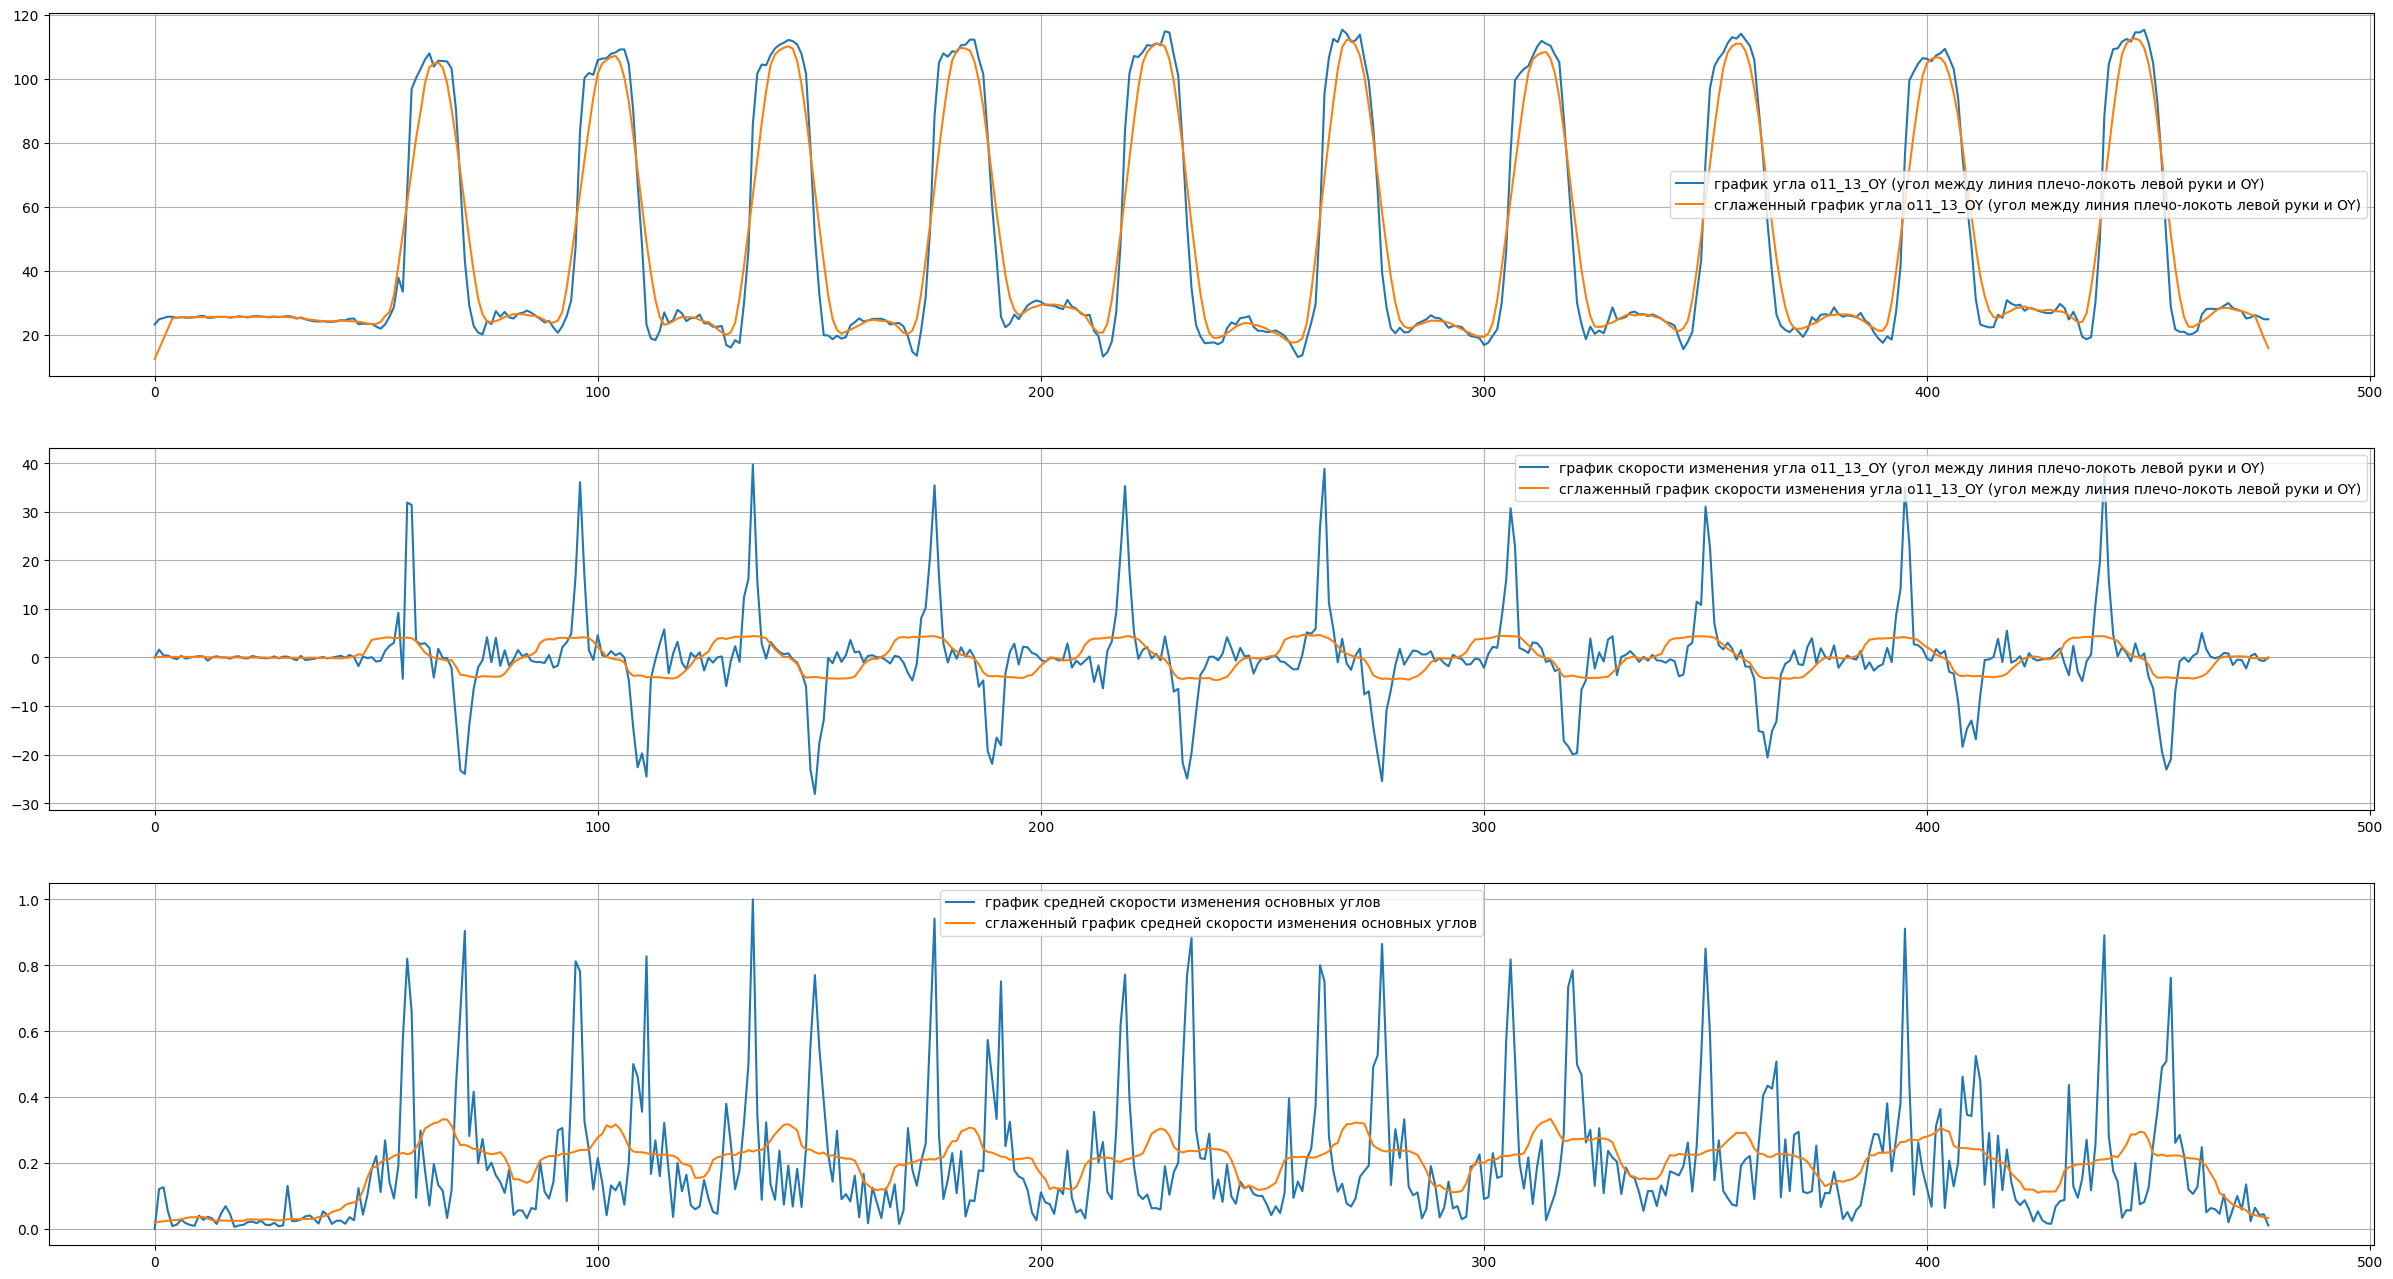

In [173]:
show_charts(df_all,reference_angles[0],show_avg_speed=True)

#Распознавание фаз движения для файла "Андрей КИДЗАМИ ДЗУКИ (2)"

In [174]:
def is_condition(df_row,condition):
  '''
  Принимает на вход строку Series (все данные о текущем кадре),  и условие
  парсит условие и проверяет, выполнение условия
  Если выполняется, возвращает True, иначе False
  '''
  value=df_row[condition[0]]
  compare=condition[1]
  threshold=condition[2]
  if compare=='>' and value > threshold:
    return True
  if compare=='<' and value < threshold:
    return True
  return False

In [175]:
def is_conditions(df_row,conditions):
  '''
  Принимает на вход строку Series (все данные о текущем кадре),  и список условий
  Если строка соответствует всем условиям, возвращает True, иначе False
  '''
  for condition in conditions:
    if not is_condition(df_row,condition):
      return False
  return True

In [176]:
def get_frame_status (df_row,rules):
  '''
  Принимает на вход строку Series (все данные о текущем кадре),  и набор правил с условиями
  Возвращает первый успешный результат проверки на соответсвие данных правилам
  Если соответствия не найдены, возвращается статус 0 'unknown'
  '''

  for rule in rules:
    conditions=rule['conditions']
    if is_conditions(df_row,conditions):
      return rule['status'], rule['name']
  return 0,'unknown'




In [177]:
def get_MaxMin(data, dist=5, find_min= False, show_info=False):
  '''
  Ищет минимумы в графике, находит максимальный из них
  data - входные данные
  dist - минимальная дистанция между пиками
  find_min - Если True, график переворачивается и ищутся минимумы
  show_info - печатать или не печатать найденые значения, выводить или не выводить график (для отладки)
  '''
  temp_data=data.copy()
  if find_min:
    temp_data=temp_data*-1
  max_peaks, peaks_properties = find_peaks(temp_data, distance=dist, height=np.min(temp_data))# нашли все максимумы
  #нам нужно найти максимальный выброс в минимумах. Значит надо отсечь глобальные максимумы
  max_value=np.max(peaks_properties['peak_heights'])
  min_value=np.min(peaks_properties['peak_heights'])
  threshold=min_value+(max_value-min_value)/3 #максимальные пики должны быть не меньше этого размера
  global_max_peaks, global_peaks_properties = find_peaks(temp_data, distance=len(data)//10*0.8, height=threshold)# нашли все максимумы
  print(f'найдено {len(global_max_peaks)} global_max_peaks')
  #отбираем только те пики, которые не входят в global_max_peaks
  max_peaks_set=set(max_peaks)
  global_max_peaks_set=set(global_max_peaks)
  other_max_peaks_set=max_peaks_set.difference(global_max_peaks_set)
  other_max_peaks=list(other_max_peaks_set)
  #теперь отсечем те пики, значение которых больше  минимального значения глобальных пик
  min_global_value=np.min(global_peaks_properties['peak_heights'])
  other_max_peaks=[x for x in other_max_peaks if temp_data[x]<min_global_value]
  max_min_value=np.max(temp_data[other_max_peaks]) #Максимальное значение минимума
  if show_info:
    plt.plot(temp_data)
    for peak in other_max_peaks:
      plt.scatter(peak,temp_data[peak],c='g')
    for peak in global_max_peaks:
      plt.scatter(peak,temp_data[peak],c='r')
    plt.axhline(y=threshold, color='g', linestyle='-')
    plt.axhline(y=max_min_value, color='r', linestyle='-')
    plt.show()
  return max_min_value,min_value

найдено 10 global_max_peaks


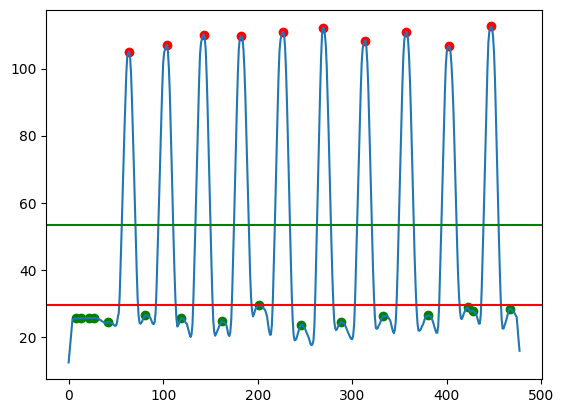

29.511013155407948

In [178]:
max_min_value,min_value=min_angle_threshold=get_MaxMin(df_all[reference_angles[0]+"_sm"].values, show_info=True) #Можно считать, что угол больший чем min_angle_threshold это фаза удара или взврата
min_angle_threshold=max_min_value#-(max_min_value-min_value)*0.1
min_angle_threshold

найдено 10 global_max_peaks


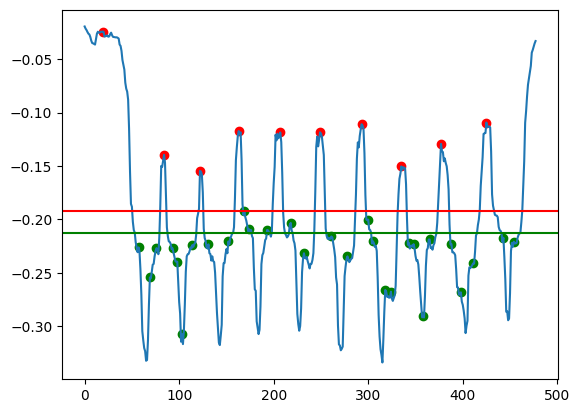

In [179]:
#анализируем график средней скорости движения
#нам надо найти минимумы выбросов, исключая сами минимумы, график будет перевернут
min_avg_speed_threshold,_=get_MaxMin(data=df_all["avg_speed_sm"].values,find_min=True, show_info=True) #Можно считать, что если средняя скорость меньше чем  чем min_speed_threshold это фаза стойки
min_avg_speed_threshold=min_avg_speed_threshold*-1

In [180]:
min_avg_speed_threshold

0.19229520050176538

In [181]:
#анализируем скорость
#plt.hist(np.abs(df_all[reference_angles[0]+"_speed_sm"]))
#plt.show()
max_speed=np.max(np.abs(df_all[reference_angles[0]+"_speed_sm"]))
min_speed_threshold=max_speed*0.20
print(f'Для данной серии ударов модуль скорости большей чем  {min_speed_threshold} можно уверенно считать фазой удара или фазой возврата')

Для данной серии ударов модуль скорости большей чем  0.931379987157853 можно уверенно считать фазой удара или фазой возврата


In [182]:
rules=[
    {
    'name':'Stance',
    'status':1,
    'conditions':
     [
      [reference_angles[0]+'_sm','<',min_angle_threshold],
      [reference_angles[0]+'_speed_sm','<',min_speed_threshold],
      [reference_angles[0]+'_speed_sm','>',min_speed_threshold*-1],
      ['avg_speed_sm','<',min_avg_speed_threshold]
     ]
    },

    {
    'name':'kick',
    'status':2,
    'conditions':
     [
      [reference_angles[0]+'_sm','>',min_angle_threshold],
      [reference_angles[0]+'_speed_sm','>',min_avg_speed_threshold/3],#раньше был 0, но всплывали выбросы близкие к 0
      ['avg_speed_sm','>',min_avg_speed_threshold]
     ]
    },
    {
    'name':'return',
    'status':3,
    'conditions':
     [
      [reference_angles[0]+'_sm','>',min_angle_threshold],
      [reference_angles[0]+'_speed_sm','<',min_avg_speed_threshold/-3],#раньше был 0, но всплывали выбросы близкие к 0
      ['avg_speed_sm','>',min_avg_speed_threshold]
     ]
 }
]

In [183]:
def print_frame_data(frame_index):
  print(f"Номер кадра {frame_index}: угол:{df_all[reference_angles[0]+'_sm'][frame_index]:5.2f};  скорость: {df_all[reference_angles[0]+'_speed_sm'][frame_index]:5.2f}")

In [184]:
#Первый проход по кадрам с использованием правил
frame_res=[]
df_row=None
for index in df_all.index:
  df_row=df_all.loc[index]
  res=get_frame_status(df_row,rules)[0]
  #print_frame_data(index)
  #print (f'результат {res}')
  frame_res.append(res)

In [185]:
np_res=np.array(frame_res)
np_res

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [186]:
#второй проход обрабатываем нераспознаные кадры на основе соседей
def replace_unknown_status(arr):
    # Создаем копию массива для изменений
    new_arr = arr.copy()
    arr_len=arr.shape[0]

    #первый и последний кадр обычно стойка
    if new_arr[arr_len-1]==0:
      new_arr[arr_len-1]=1
    if new_arr[0]==0:
      new_arr[0]=1
    for i in range(arr_len):
      if new_arr[i]==0:
        # Если текущий статус неизвестен (равен 0)
        right_neighbor = i + 1
        left_neighbor=i-1
        # Ищем ближайшего соседа  справа с известными статусами
        while right_neighbor < arr_len and new_arr[right_neighbor] == 0:
            right_neighbor += 1
        # Если найден
        if right_neighbor < arr_len:
          if new_arr[left_neighbor] == new_arr[right_neighbor]:
            # Устанавливаем статусы, слева и справа равны, устанавливаем статус равный статусу ближайшего соседа справа
            new_arr[i:right_neighbor] = new_arr[right_neighbor]
          else:
            # Статусы слева и справа разные. Первой половине присваиваем статус как слева, второй половине как справа
            undefined_len=right_neighbor-i
            left_len=int(undefined_len//2)
            new_arr[i:i+left_len] = new_arr[left_neighbor]
            right_len=undefined_len-left_len
            new_arr[right_neighbor-right_len:right_neighbor] = new_arr[right_neighbor]
    return new_arr
np_res2=replace_unknown_status(np_res)
np_res2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,

#Проецируем результаты на видео для визуальной оценки

In [187]:
#Возможные состояния
STATUS_STANCE=1
STATUS_KICK=2
STATUS_RET=3

statuses={
    STATUS_STANCE:'STANCE',
    STATUS_KICK:'KICK',
    STATUS_RET:'RETURN'
}


In [188]:
#для визуализации угла получаем названия столбцов в датафрейме df1 с координатами
dots=reference_angles[0][1:].split('_')
df1=df1.reset_index(drop=True)
dots

['11', '13', 'OY']

In [189]:
DisplaySkipFrame=10
def mark_move(VideoPathIn, VideoPathOut,status_list):
  '''
  Принимает на вход путь к видеофайлу, маркирует каждый кадр, формирует новое видео  по VideoPathOut
  '''
  cap = cv2.VideoCapture(VideoPathIn)
  if (cap.isOpened() == False):
    print("Ошибка открытия видеофайла")
  fps = int(cap.get(cv2.CAP_PROP_FPS))
  total_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frame_size=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  #print (frame_size)
  Output = cv2.VideoWriter(VideoPathOut, cv2.VideoWriter_fourcc(*'MP4V'), fps, frame_size)
  FrameIndex=0
  while(True): # Вывод кадров производится  в цикле
    ret, frame = cap.read()
    if total_frame_count<=FrameIndex:
      break;
    if not ret: #кадр не вернулся по какой то причине
      FrameIndex +=1
      continue
    status=status_list[FrameIndex]
    cv2.putText(frame, statuses[status], (10,100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255), 7)
    cv2.putText(frame, f'frame:{FrameIndex}', (10,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 7)
    cv2.putText(frame, f'angle:{df_all[reference_angles[0]+"_sm"][FrameIndex]:5.2f}', (10,300), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 7)
    cv2.putText(frame, f'speed:{df_all[reference_angles[0]+"_speed_sm"][FrameIndex]:5.2f}', (10,400), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 7)

    #Отображения референсного угла
    dot_list=[] #здесь будем хранить координаты пересчитанных точек для данного кадра
    if dots is not None:
      #рисуем точки
      for dot in dots:
        if dot=='OX' or dot=='OY' or dot=='OZ':
          continue
        x=int(df1['x_'+dot][FrameIndex]*frame_size[0])
        y=int(df1['y_'+dot][FrameIndex]*frame_size[1])
        cv2.circle(frame,(x,y),1,(255,0,255),-1)
        dot_list.append((x,y))

      #рисуем линии
      if len(dot_list)%2==0:
        for i in range(0,len(dot_list),2):
          cv2.line(frame, (dot_list[i]), (dot_list[i+1]), (0, 255, 0), thickness=2)
      else:
        for i in range(0,len(dot_list)-1):
          cv2.line(frame, (dot_list[i]), (dot_list[i+1]), (0, 255, 0), thickness=2)

        #вывод кадров на экран (для отладки, потом убрать)
    if FrameIndex%DisplaySkipFrame==1: #Начиная с первого кадра каждой секунды
      clear_output(wait=True)
      min_frame =cv2.resize(frame, (int(frame.shape[1]/5),int(frame.shape[0]/5)))
      cv2_imshow(min_frame)
      print (f'Обработано {FrameIndex} кадров')

    Output.write(frame)
    FrameIndex+=1
  Output.release()
  cap.release()
  cv2.destroyAllWindows()
  print (f'Всего обработано {FrameIndex} кадров')

In [190]:
VideoPathIn=f'/content/drive/MyDrive/internship/karate/dataset/{correct}/{main_folder}/{folder}/{video_name}.mp4'
VideoPathOut=f'/content/{video_name} Marked_v2.mp4'


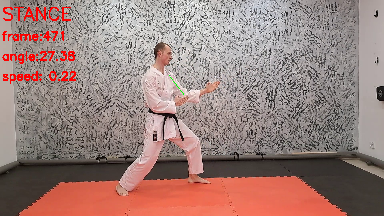

Обработано 471 кадров
Всего обработано 478 кадров


In [191]:
mark_move(VideoPathIn,VideoPathOut, np_res2)

Итоговые видео можно скачать по ссылке: [https://disk.yandex.ru/d/PUp4fjdeMpEQKg](https://disk.yandex.ru/d/PUp4fjdeMpEQKg)